In [1]:
# 10 DECEMBER 2023

# INFORMATION ABOUT THE DATASET
    # PIXEL INFORMATION
    # MNIST DIGIT DATASET: EVERY PIXEL HAS A VALUE ASSIGNED TO IT; 784 PIXEL VALUES IF I AM NOT WRONG SO; BASED ON THAT WE GET THE LABEL!


# RANDOM FOREST ALORITHM:
    # LARGE NO. OF DECISION TREES FORM AN ENSEMBLE METHOD



In [2]:
# IMPORTING SOME BASIC LIBRARIES 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# LOADING THE DATASET 

dataset=pd.read_csv('digit.csv')

In [3]:
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [4]:
# SPLITTING THE DAfrom sklearn.model_selection import train_test_splitTASET INTO DEPENDENT AND INDEPENDENT FEATURES

Y=dataset.iloc[:,0]
X=dataset.iloc[:,1:]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# TRAINING THE MODEL

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
# GETTING THE PREDICTIONS

Y_pred = model.predict(X_test)

ACCURACY: 96.42857142857143%
Checking random Y_test VS Y_pred
Predicted 6


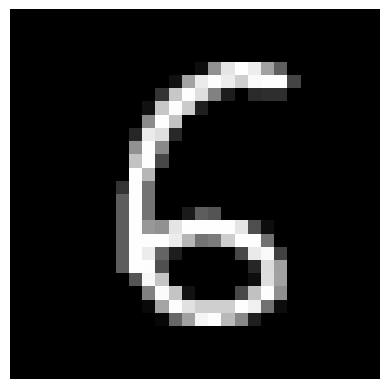

In [8]:
# GET THE ACCURACY SCORES 

from sklearn.metrics import accuracy_score

print("ACCURACY: {0}%".format(accuracy_score(Y_test, Y_pred)*100))

# VISUALISATIONS

index=5

print("Checking random Y_test VS Y_pred")
print("Predicted " + str(model.predict(X_test)[index]))

# PLOTTING Y_TEST USING THE X_TEST VALUES TAKEN UP BY MATPLOTLIB

plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')


In [9]:
# NOW I PERFORM HYPERPARAMETER TUNING TO SEE HOW THE DIFFERENT PARAMETERS AFFECT THE ACCURCAY SCORE

# THE PROCESS CAN BE SIMPLIFIED USING RANDOMSEARCH CV

# IMPORTING THE REQUIRED LIBRARIES FROM

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)

# FIT THE BEST MODEL
search.fit(X_train, Y_train)


print("BEST PARAMETERS FOUND USING RANDOM SEARCH CV :", search.best_params_)


best = search.best_estimator_
accuracy = best.score(X_test, Y_test)
print("ACCURACY !!!!", accuracy)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/shiv/ML/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shiv/ML/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shiv/ML/ML/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/shiv/ML/ML/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/shiv/ML/ML/lib/python3.

BEST PARAMETERS FOUND USING RANDOM SEARCH CV : {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
ACCURACY !!!! 0.9688571428571429
